In [1]:
import numpy as np
from numpy import array, argsort, arange

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

import sys
sys.path.insert(1, '../../../utils')
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart, \
    plot_multiline_chart, plot_evaluation_results, plot_horizontal_bar_chart, \
    HEIGHT, plot_line_chart
from studies import naive_Bayes_study, logistic_regression_study, knn_study, trees_study, mlp_study

import seaborn as sns

from matplotlib.pyplot import figure, savefig, show, subplots

import pandas as pd


In [2]:
df = pd.read_csv("../data/prepared/best_after_features.csv")
df.head()

,crash_date,intersection_related_i,damage,num_units,injuries_fatal,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,traffic_control_device_BICYCLE CROSSING SIGN,...,prim_contributory_cause_RELATED TO BUS STOP,prim_contributory_cause_ROAD CONSTRUCTION/MAINTENANCE,prim_contributory_cause_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,prim_contributory_cause_TEXTING,prim_contributory_cause_TURNING RIGHT ON RED,prim_contributory_cause_UNABLE TO DETERMINE,prim_contributory_cause_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"prim_contributory_cause_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",prim_contributory_cause_WEATHER,crash_type
0,1622822400000000000,1,0,0.460039,0.0,0.211580,0.664021,0.833333,0.454545,False,...,False,False,False,False,False,True,False,False,False,1
1,1681641000000000000,1,2,0.460039,0.0,0.634739,0.376038,0.000000,0.272727,False,...,False,False,False,False,False,True,False,False,False,0
2,1690643400000000000,1,2,0.460039,0.0,0.423159,0.616024,1.000000,0.545455,False,...,False,False,False,False,False,True,False,False,False,1
3,1615750200000000000,1,2,0.460039,0.0,0.846319,0.808012,0.000000,0.181818,False,...,False,False,False,False,False,False,False,False,False,0
4,1449927000000000000,1,2,0.460039,0.0,0.846319,0.520029,1.000000,1.000000,False,...,False,False,False,False,False,False,False,False,False,0


In [3]:
target_name = "crash_type"
file_tag = "traffic"
lab_folder = "lab4_modelling"

target = df[target_name] #pulling target out before dropping non-numerics
features = df.drop(columns=[target_name])

print(features.info())
print("Features shape:", features.shape)
print("Target shape:", target.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183860 entries, 0 to 183859
Columns: 138 entries, crash_date to prim_contributory_cause_WEATHER
dtypes: bool(129), float64(6), int64(3)
memory usage: 35.2 MB
None
Features shape: (183860, 138)
Target shape: (183860,)


In [4]:
# train/test splitting
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size=0.3,        #.7 train, .3 test
    random_state=42,      
    stratify=target       # keeps class proportions similar in train and test
)

**NAIVE BAYES ANALYSIS - TRAFFIC DATA**

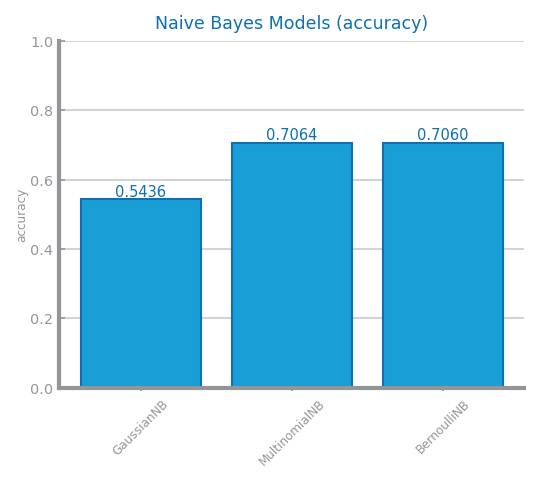

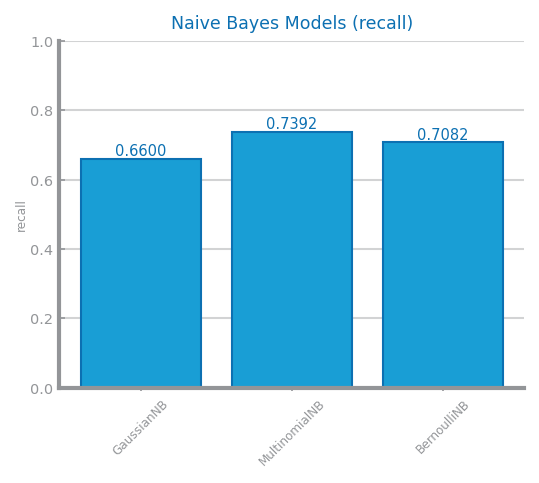

In [5]:
eval_metric = "accuracy"

figure()
nb__best_model_acc, nb__params_acc = naive_Bayes_study(
    features_train,
    target_train,
    features_test,
    target_test,
    metric=eval_metric
)
savefig(f"../charts/{lab_folder}/{file_tag}_nb_{eval_metric}_study_best.png", bbox_inches='tight')
show()

figure()
nb__best_model_rec, nb__params_rec = naive_Bayes_study(
    features_train,
    target_train,
    features_test,
    target_test,
    metric="recall"
)
savefig(f"../charts/{lab_folder}/{file_tag}_nb_recall_study_best.png", bbox_inches='tight')
show()

<Figure size 600x450 with 0 Axes>

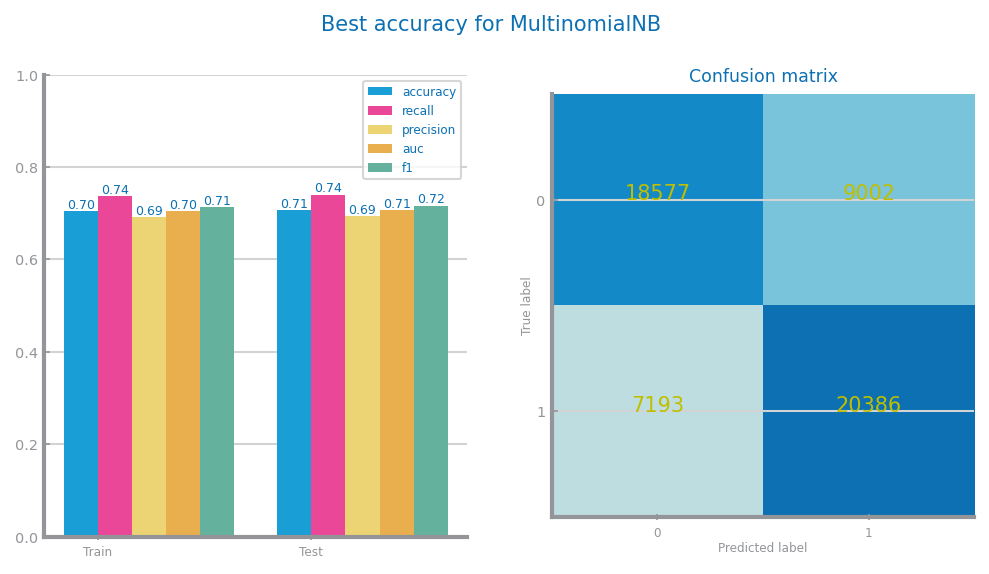

In [6]:
prd_trn_nb = nb__best_model_acc.predict(features_train)
prd_tst_nb = nb__best_model_acc.predict(features_test)

nb_labels = sorted(np.unique(target_train))

figure()
plot_evaluation_results(
    nb__params_acc,
    array(target_train),
    array(prd_trn_nb),
    array(target_test),
    array(prd_tst_nb),
    nb_labels
)
savefig(f'../charts/{lab_folder}/{file_tag}_nb_{nb__params_acc["name"]}_best_{nb__params_acc["metric"]}_eval_best.png', bbox_inches='tight')
show()

**KNN ANALYSIS - TRAFFIC DATA**

In [ ]:
eval_metric = "accuracy"

figure()
knn_best_model, knn_params = knn_study(
    features_train,
    target_train,
    features_test,
    target_test,
    k_max=35,
    lag=2,
    metric=eval_metric,
)
savefig(f"../charts/{lab_folder}/{file_tag}_knn_{eval_metric}_study_best.png", bbox_inches='tight')
show()

In [ ]:
prd_trn_knn = knn_best_model.predict(features_train)
prd_tst_knn = knn_best_model.predict(features_test)

knn_labels = sorted(np.unique(target_train))

figure()
plot_evaluation_results(
    knn_params,
    array(target_train),
    array(prd_trn_knn),
    array(target_test),
    array(prd_tst_knn),
    knn_labels,
)
savefig(f"../charts/{lab_folder}/{file_tag}_{knn_params['name']}_best_{knn_params['metric']}_eval_best.png", bbox_inches='tight')
show()

In [ ]:
distance = knn_params["params"][1]   # best distance from KNN study, e.g. 'euclidean'
K_MAX = 35
kvalues = [i for i in range(1, K_MAX + 1, 2)]

y_tst_values = []
y_trn_values = []
acc_metric = "accuracy"

for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(features_train, target_train)
    prd_tst_Y = clf.predict(features_test)
    prd_trn_Y = clf.predict(features_train)

    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](target_test, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](target_train, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=acc_metric,
    percentage=True,
)
savefig(f"../charts/{lab_folder}/{file_tag}_knn_overfitting_best.png", bbox_inches='tight')
show()

**LOGISTIC REGRESSION ANALYSIS - TRAFFIC DATA**

LR best for 500 iterations (penalty=l1) with accuracy=0.746818


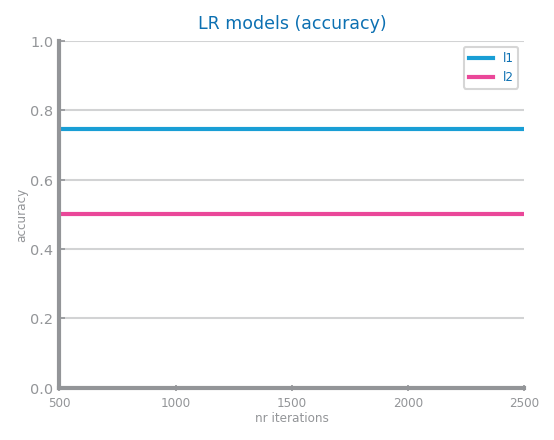

In [7]:
eval_metric = "accuracy"

figure()
lr_best_model, lr_params = logistic_regression_study(
    features_train,
    target_train,
    features_test,
    target_test,
    nr_max_iterations=2500,
    lag=500,
    metric=eval_metric,
)
savefig(f"../charts/{lab_folder}/{file_tag}_lr_{eval_metric}_study_best.png", bbox_inches='tight')
show()

<Figure size 600x450 with 0 Axes>

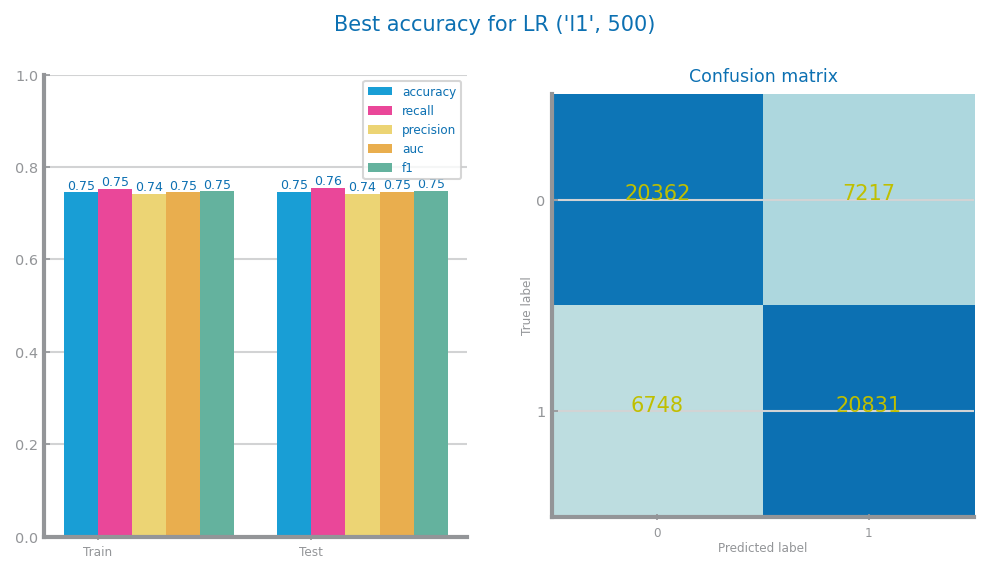

In [8]:
prd_trn_lr = lr_best_model.predict(features_train)
prd_tst_lr = lr_best_model.predict(features_test)

lr_labels = sorted(np.unique(target_train))

figure()
plot_evaluation_results(
    lr_params,
    array(target_train),
    array(prd_trn_lr),
    array(target_test),
    array(prd_tst_lr),
    lr_labels,
)
savefig(f'../charts/{lab_folder}/{file_tag}_{lr_params["name"]}_best_{lr_params["metric"]}_eval_best.png', bbox_inches='tight')
show()

**DECISION TREES ANALYSIS - TRAFFIC DATA**

DT best with entropy and d=10


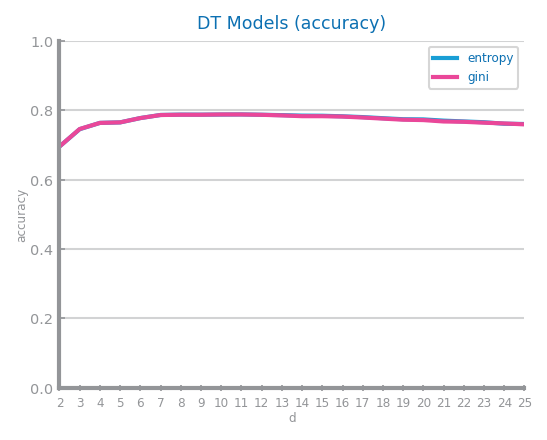

In [9]:
eval_metric = "accuracy"

figure()
dt_best_model, dt_params = trees_study(
    features_train,
    target_train,
    features_test,
    target_test,
    d_max=25,
    lag=1,
    metric=eval_metric,
)
savefig(f"../charts/{lab_folder}/{file_tag}_dt_{eval_metric}_study_best.png", bbox_inches='tight')
show()

<Figure size 600x450 with 0 Axes>

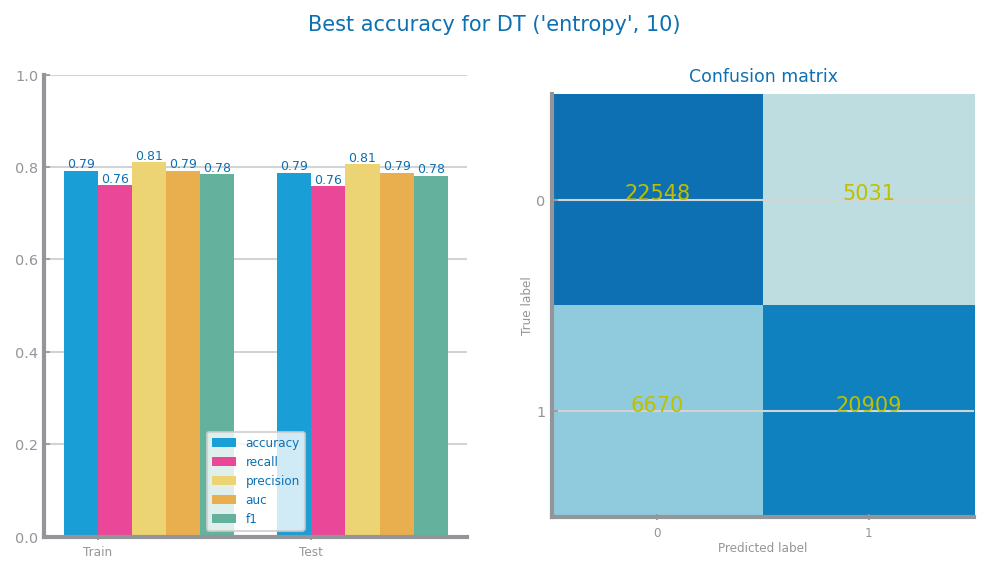

In [10]:
prd_trn_dt = dt_best_model.predict(features_train)
prd_tst_dt = dt_best_model.predict(features_test)

dt_labels = sorted(np.unique(target_train))

figure()
plot_evaluation_results(
    dt_params,
    array(target_train),
    array(prd_trn_dt),
    array(target_test),
    array(prd_tst_dt),
    dt_labels,
)
savefig(f'../charts/{lab_folder}/{file_tag}_{dt_params["name"]}_best_{dt_params["metric"]}_eval_best.png', bbox_inches='tight')
show()

TypeError: can only concatenate str (not "numpy.int64") to str

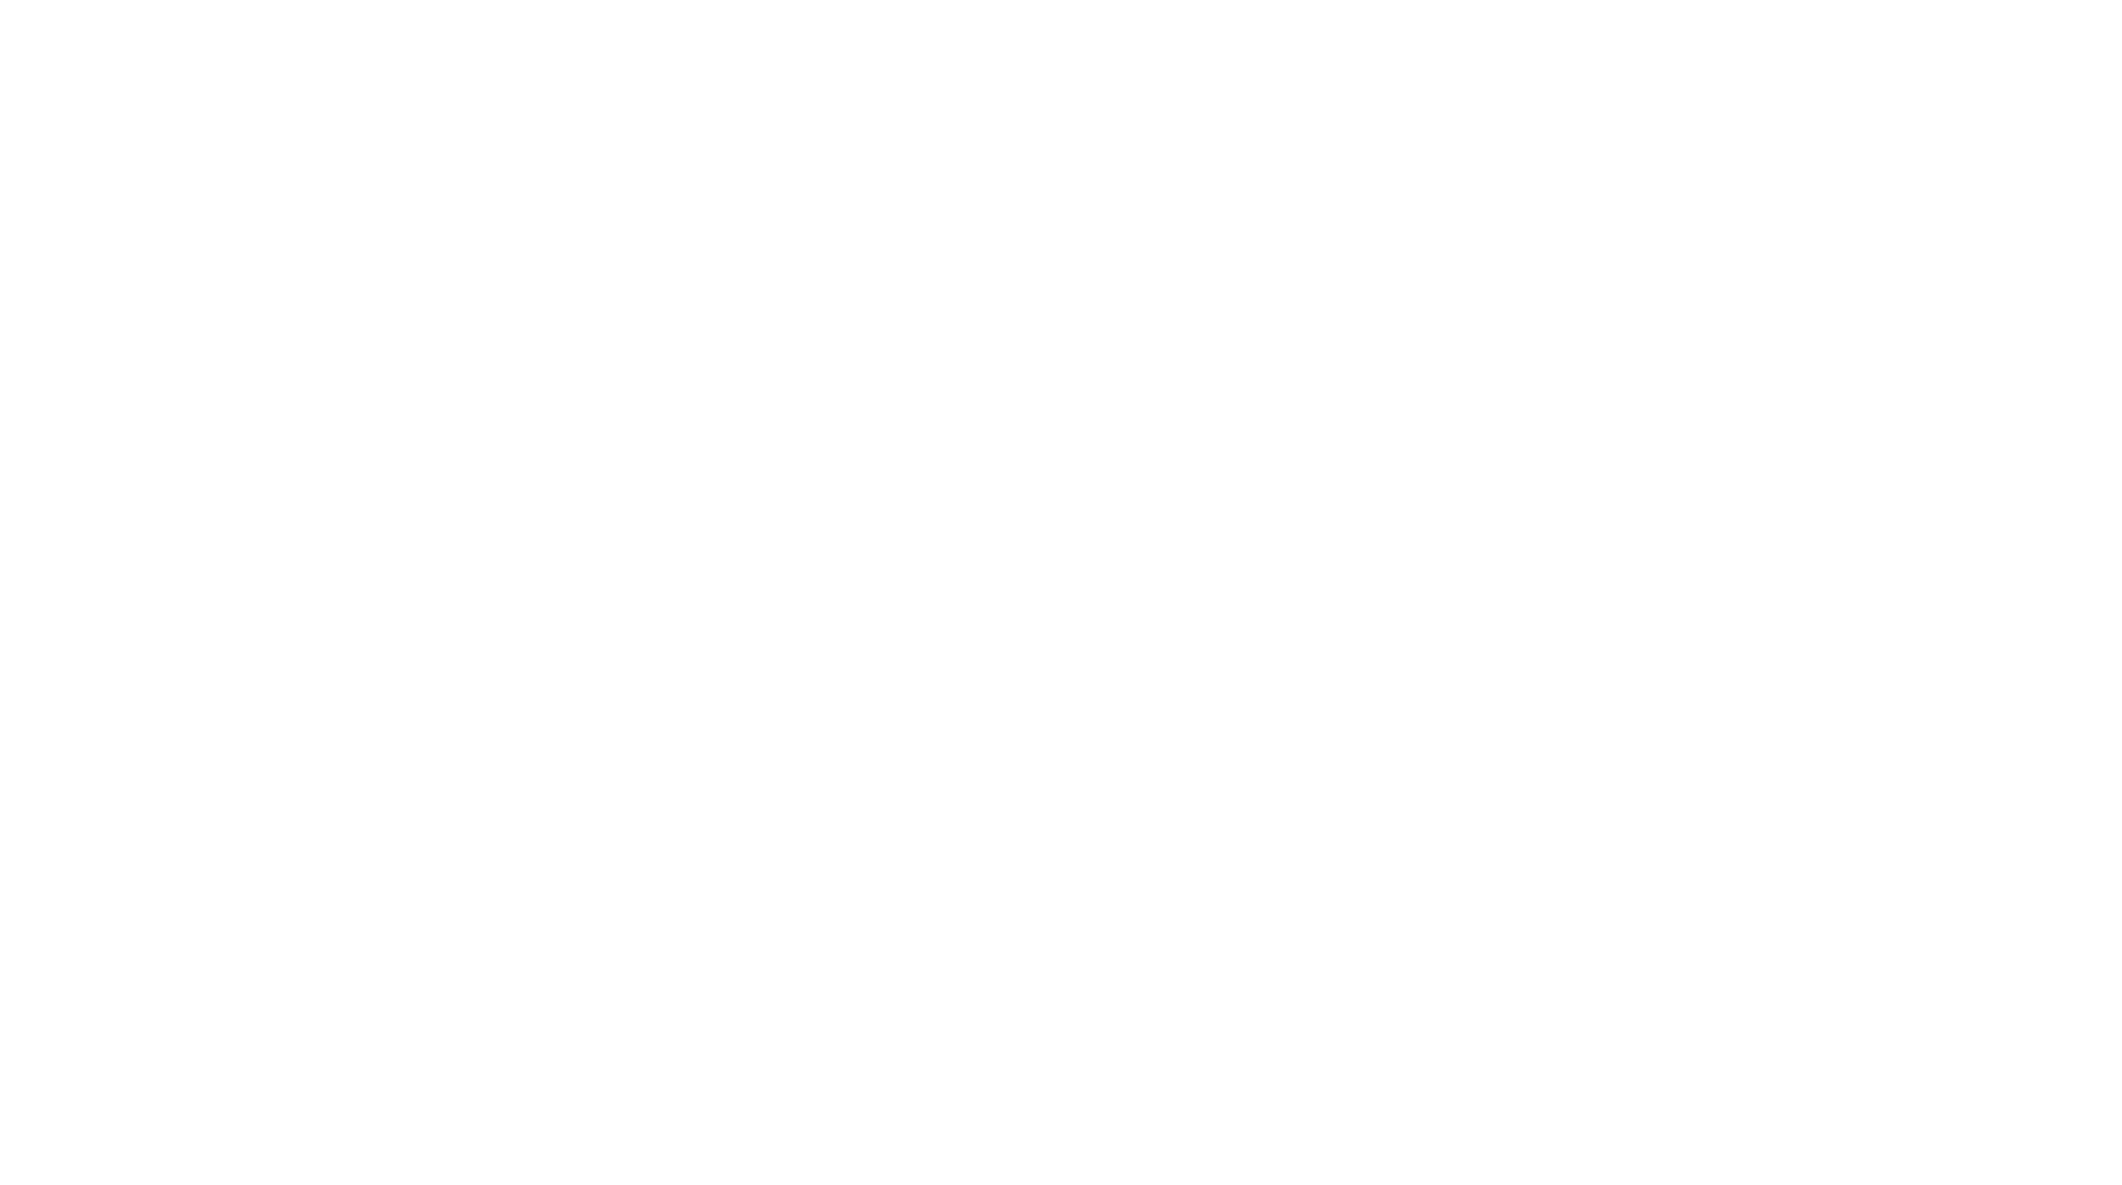

In [13]:
max_depth2show = 3   # adjust if you want deeper/shallower views
dt_feature_names = list(features.columns)

dt_class_names = sorted(target.unique())

figure(figsize=(18, 10))
plot_tree(
    dt_best_model,
    max_depth=max_depth2show,
    feature_names=dt_feature_names,
    class_names=dt_class_names,
    filled=True,
    rounded=True,
    impurity=False,
    precision=2,
)
savefig(f"../charts/{lab_folder}/{file_tag}_dt_tree_depth{max_depth2show}_best.png", bbox_inches='tight')
show()

1. injuries_no_indication (0.45412010222628507)
2. damage (0.15927479215997437)
3. num_units (0.09729966577528366)
4. first_crash_type_PARKED MOTOR VEHICLE (0.07643889584576413)
5. first_crash_type_ANGLE (0.052597149234211674)
6. first_crash_type_TURNING (0.02503912357837334)
7. crash_date (0.018587510469875106)
8. first_crash_type_PEDESTRIAN (0.015471491003228472)
9. first_crash_type_FIXED OBJECT (0.013335281544951361)
10. crash_hour (0.012303012673748753)
11. prim_contributory_cause_DISREGARDING TRAFFIC SIGNALS (0.009125595588208133)
12. prim_contributory_cause_FAILING TO YIELD RIGHT-OF-WAY (0.008446518500331058)
13. weather_condition_UNKNOWN (0.006985167149091115)
14. first_crash_type_HEAD ON (0.006506819122700232)
15. first_crash_type_PEDALCYCLIST (0.0055471326342639805)
16. prim_contributory_cause_FAILING TO REDUCE SPEED TO AVOID CRASH (0.003955870116875351)
17. first_crash_type_REAR END (0.00362155717335129)
18. lighting_condition_DARKNESS, LIGHTED ROAD (0.0034374596462473377)
19

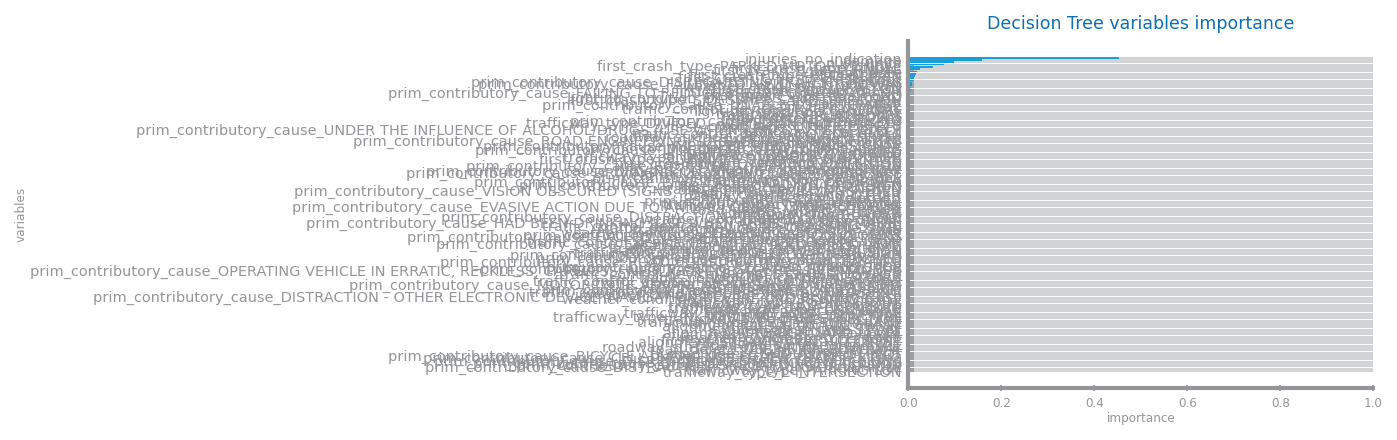

In [14]:
importances = dt_best_model.feature_importances_

indices = argsort(importances)[::-1]
dt_vars = list(features.columns)
elems = []
imp_values = []

# print ranked list like professor
for f in range(len(dt_vars)):
    feature_name = dt_vars[indices[f]]
    feature_imp = importances[indices[f]]

    elems.append(feature_name)
    imp_values.append(feature_imp)

    print(f"{f+1}. {feature_name} ({feature_imp})")

figure()
plot_horizontal_bar_chart(
    elems,
    imp_values,
    title="Decision Tree variables importance",
    xlabel="importance",
    ylabel="variables",
    percentage=True,
)
savefig(f"../charts/{lab_folder}/{file_tag}_dt_importance_ranking_best.png", bbox_inches='tight')
show()

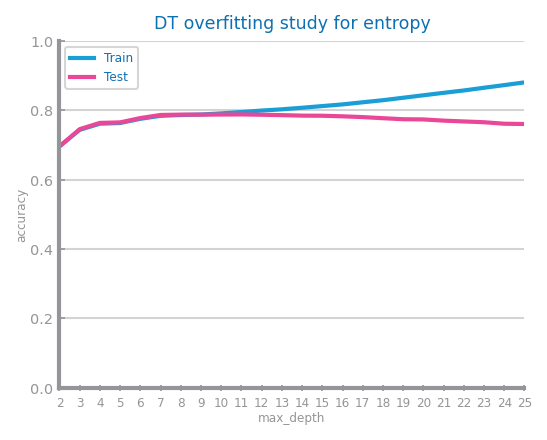

In [15]:
crit = dt_params["params"][0]   # 'entropy' or 'gini'
d_max = 25
depths = [i for i in range(2, d_max + 1, 1)]

y_tst_values = []
y_trn_values = []
acc_metric = "accuracy"

for d in depths:
    clf = DecisionTreeClassifier(
        max_depth=d,
        criterion=crit,
        min_impurity_decrease=0,
        random_state=42,
    )
    clf.fit(features_train, target_train)
    prd_tst_Y = clf.predict(features_test)
    prd_trn_Y = clf.predict(features_train)

    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](target_test, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](target_train, prd_trn_Y))

figure()
plot_multiline_chart(
    depths,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"DT overfitting study for {crit}",
    xlabel="max_depth",
    ylabel=acc_metric,
    percentage=True,
)
savefig(f"../charts/{lab_folder}/{file_tag}_dt_accuracy_overfitting_best.png", bbox_inches='tight')
show()

**MLP ANALYSIS - TRAFFIC DATA**

In [ ]:
LAG = 100
NR_MAX_ITER = 400

eval_metric = "accuracy"

figure()
mlp_best_model, mlp_params = mlp_study(
    features_train,
    target_train,
    features_test,
    target_test,
    nr_max_iterations=NR_MAX_ITER,
    lag=LAG,
    metric=eval_metric,
)
savefig(f"../charts/{lab_folder}/{file_tag}_mlp_{eval_metric}_study_best.png", bbox_inches='tight')
show()

In [ ]:
prd_trn_mlp = mlp_best_model.predict(features_train)
prd_tst_mlp = mlp_best_model.predict(features_test)

mlp_labels = sorted(np.unique(target_train))

figure()
plot_evaluation_results(
    mlp_params,
    array(target_train),
    array(prd_trn_mlp),
    array(target_test),
    array(prd_tst_mlp),
    mlp_labels,
)
savefig(f"../charts/{lab_folder}/{file_tag}_{mlp_params['name']}_best_{mlp_params['metric']}_eval_best.png", bbox_inches='tight')
show()

In [ ]:
lr_type = mlp_params["params"][0]
lr = mlp_params["params"][1]

nr_iterations = [i for i in range(LAG, NR_MAX_ITER + 1, LAG)]

y_tst_values = []
y_trn_values = []
acc_metric = "accuracy"

for n in nr_iterations:
    clf = MLPClassifier(
        learning_rate=lr_type,
        learning_rate_init=lr,
        max_iter=n,
        activation="logistic",
        solver="adam",
        verbose=False,
        random_state=42,
    )
    clf.fit(features_train, target_train)
    prd_tst_Y = clf.predict(features_test)
    prd_trn_Y = clf.predict(features_train)

    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](target_test, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](target_train, prd_trn_Y))

figure()
plot_multiline_chart(
    nr_iterations,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"MLP overfitting study for lr_type={lr_type} and lr={lr}",
    xlabel="nr_iterations",
    ylabel=acc_metric,
    percentage=True,
)
savefig(f"../charts/{lab_folder}/{file_tag}_mlp_accuracy_overfitting_best.png", bbox_inches='tight')
show()

In [ ]:
figure()
plot_line_chart(
    arange(len(mlp_best_model.loss_curve_)),
    mlp_best_model.loss_curve_,
    title="Loss curve for MLP best model training",
    xlabel="iterations",
    ylabel="loss",
    percentage=False,
)
savefig(f"../charts/{lab_folder}/{file_tag}_mlp_{eval_metric}_loss_curve_best.png", bbox_inches='tight')
show()